In [65]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np

In [66]:
#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv('dataset/dengue_features_train.csv')
dengue_features_test = pd.read_csv('dataset/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('dataset/dengue_labels_train.csv')


In [67]:
#Display the train data
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [68]:
dengue_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [69]:
#row count 
dengue_features_train.shape

(1456, 24)

In [70]:
#The dataset contains information on 1456 weeks for the 2 cities across 24 features.

In [71]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [72]:

#Let's fusion the 2 dataframes:
#Merging the Train dataframe with the labels data frame 

dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [73]:
dengue_train.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [74]:
dengue_train.shape

(1456, 25)

In [75]:
#Check duplicate rows
np.sum(dengue_train.duplicated())

0

In [76]:
dengue_features_test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [77]:
dengue_features_test.shape

(416, 24)

In [78]:
#Check duplicate rows
np.sum(dengue_features_test.duplicated())


0

In [79]:
#Lets do Exploratory data analysis based on the city

#City : San Juan, Puerto Rico (sj) 
#City2 : Iquitos (iq)

/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0, 0.09)

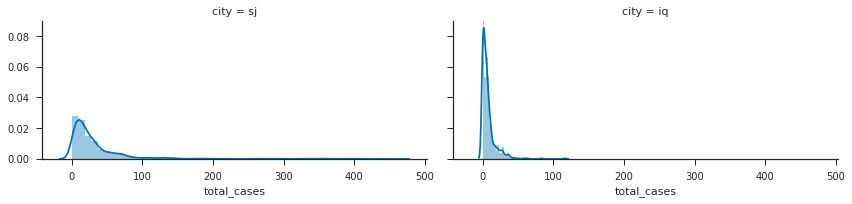

In [80]:
#Lets check the total cases of Dengue in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


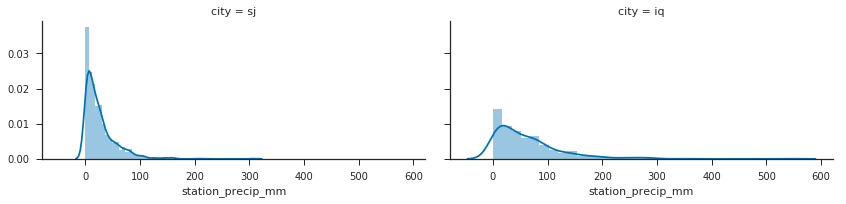

In [81]:
#Lets check the station_precip_mm in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_precip_mm")

/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


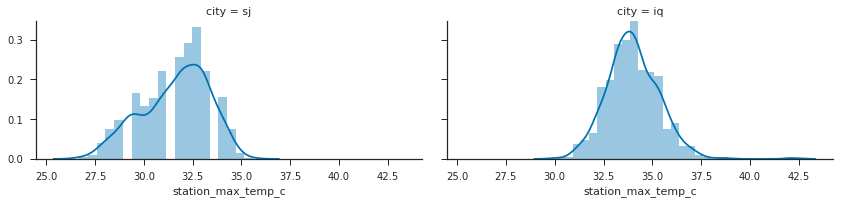

In [82]:
#Lets check the station_max_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_max_temp_c") 

/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


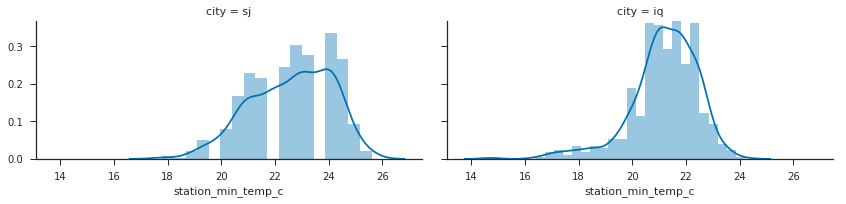

In [83]:
#Lets check the station_min_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_min_temp_c") 

/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/anubhav/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


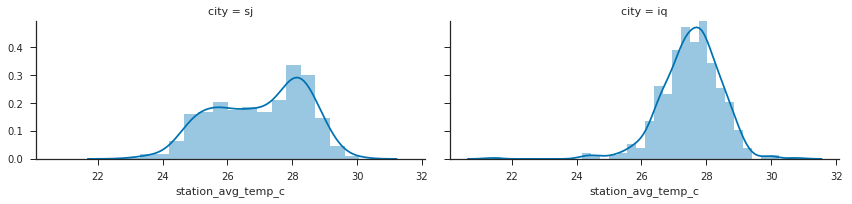

In [84]:
#Lets check the station_avg_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_avg_temp_c") 

In [85]:
dengue_train.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

/home/anubhav/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Evolution of dengue disease through time')

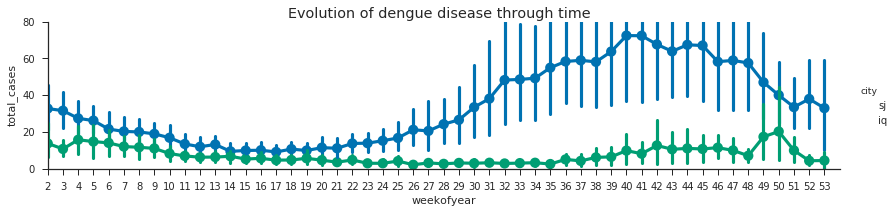

In [86]:
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(dengue_train, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = dengue_train.weekofyear.max()
min_x = dengue_train.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

In [87]:
dengue_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

In [88]:
dengue_features_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [89]:
dengue_train.city.value_counts()
#count of unique city's available 

sj    936
iq    520
Name: city, dtype: int64

In [90]:
#count of unique city's available 

dengue_features_test.city.value_counts()

sj    260
iq    156
Name: city, dtype: int64

# Dividing dataset into 2 different dataset for 2 different cities

In [91]:
dengue_train_sj = dengue_train[dengue_train.city == 'sj'].copy()

In [92]:
dengue_train_iq = dengue_train[dengue_train.city == 'iq'].copy()

In [93]:
dengue_test_sj = dengue_features_test[dengue_features_test.city == 'sj'].copy()
dengue_test_iq = dengue_features_test[dengue_features_test.city == 'iq'].copy()

In [94]:
dengue_train_sj.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [95]:
dengue_train_iq.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [96]:
dengue_train_sj.fillna(method='ffill', inplace=True)

In [97]:
dengue_train_iq.fillna(method='ffill', inplace=True)

In [98]:
#dengue_features_test
#we'll take a simple approach and just fill those values with the most recent value that we saw up 
#to that point. 
#This is probably a good part of the problem to improve your score by getting smarter.

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [100]:
#Which inputs strongly correlate with total_cases

# compute the correlations
sj_correlations = dengue_train_sj.corr()
iq_correlations = dengue_train_iq.corr()

In [101]:
sj_correlations

,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.073143,-0.212690,-0.388985,-0.495028,0.008188,-0.080679,0.039130,0.188870,0.192929,...,-0.131579,-0.281204,0.039130,0.022695,0.325254,-0.094621,-0.276345,-0.169664,0.000753,0.084859
weekofyear,-0.073143,1.000000,0.287134,-0.062458,-0.035011,-0.038279,-0.074096,0.236115,0.567984,0.554162,...,0.253056,0.305921,0.236115,0.579267,-0.103152,0.480078,-0.140037,0.320370,0.518216,0.214038
total_cases,-0.212690,0.287134,1.000000,0.004144,0.059208,-0.120024,0.041055,0.056942,0.179402,0.172569,...,0.106591,0.142317,0.056942,0.205338,-0.067920,0.194126,0.034801,0.187544,0.174285,0.050835
ndvi_ne,-0.388985,-0.062458,0.004144,1.000000,0.614698,0.207491,0.157257,-0.059808,-0.082125,-0.080713,...,-0.002043,0.021659,-0.059808,-0.051206,-0.018890,0.055838,0.186319,0.102780,0.002738,-0.083680
ndvi_nw,-0.495028,-0.035011,0.059208,0.614698,1.000000,0.188704,0.219810,-0.041504,-0.077612,-0.076369,...,0.004620,0.071808,-0.041504,-0.022846,-0.049042,0.088248,0.183969,0.136895,0.017841,-0.083308
ndvi_se,0.008188,-0.038279,-0.120024,0.207491,0.188704,1.000000,0.797349,-0.111004,-0.013301,-0.010259,...,-0.129487,-0.116481,-0.111004,-0.058377,0.041177,-0.063100,0.005305,-0.075178,-0.072331,-0.137604
ndvi_sw,-0.080679,-0.074096,0.041055,0.157257,0.219810,0.797349,1.000000,-0.115206,-0.038681,-0.031778,...,-0.121106,-0.114106,-0.115206,-0.075421,0.052047,-0.035083,0.069963,-0.010211,-0.068595,-0.169807
precipitation_amt_mm,0.039130,0.236115,0.056942,-0.059808,-0.041504,-0.111004,-0.115206,1.000000,0.236147,0.224713,...,0.508989,0.501899,1.000000,0.411872,-0.093284,0.198585,-0.158887,0.192706,0.228427,0.567309
reanalysis_air_temp_k,0.188870,0.567984,0.179402,-0.082125,-0.077612,-0.013301,-0.038681,0.236147,1.000000,0.997502,...,0.080427,0.299337,0.236147,0.905102,0.177733,0.880699,0.041772,0.699227,0.832807,0.115062
reanalysis_avg_temp_k,0.192929,0.554162,0.172569,-0.080713,-0.076369,-0.010259,-0.031778,0.224713,0.997502,1.000000,...,0.062675,0.285559,0.224713,0.896541,0.200647,0.878872,0.056190,0.704506,0.827170,0.099347


In [102]:
iq_correlations

,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.136842,0.179451,-0.061312,0.033645,-0.068539,-0.013061,0.087477,0.025900,0.007958,...,0.162730,0.254581,0.087477,0.322473,-0.235963,0.080529,-0.118322,0.014077,0.127615,-0.035498
weekofyear,-0.136842,1.000000,-0.011850,0.257832,0.226371,0.326793,0.261047,-0.104390,0.287895,0.301060,...,-0.148093,-0.278322,-0.104390,-0.082903,0.345075,0.084278,0.218064,0.189582,-0.093604,-0.045229
total_cases,0.179451,-0.011850,1.000000,0.019740,-0.010520,-0.041153,0.031369,0.089410,0.096666,0.080056,...,0.100686,0.128548,0.089410,0.234918,-0.130535,0.114431,-0.021254,0.079937,0.202844,0.045283
ndvi_ne,-0.061312,0.257832,0.019740,1.000000,0.764985,0.770023,0.842322,-0.008574,0.153966,0.169574,...,-0.083552,-0.135651,-0.008574,-0.030730,0.169956,0.120930,0.146313,0.142054,-0.007827,0.010807
ndvi_nw,0.033645,0.226371,-0.010520,0.764985,1.000000,0.646231,0.765632,-0.055308,0.152324,0.169079,...,-0.077146,-0.132084,-0.055308,-0.028628,0.165977,0.124745,0.193135,0.149415,-0.090059,-0.016191
ndvi_se,-0.068539,0.326793,-0.041153,0.770023,0.646231,1.000000,0.714706,-0.038086,0.195719,0.207485,...,-0.122608,-0.188403,-0.038086,-0.058624,0.221448,0.127715,0.174722,0.157924,-0.051418,0.011709
ndvi_sw,-0.013061,0.261047,0.031369,0.842322,0.765632,0.714706,1.000000,-0.016022,0.162238,0.175390,...,-0.063474,-0.138891,-0.016022,-0.026808,0.171700,0.120515,0.174293,0.171488,-0.054636,-0.004503
precipitation_amt_mm,0.087477,-0.104390,0.089410,-0.008574,-0.055308,-0.038086,-0.016022,1.000000,-0.047794,-0.053616,...,0.337380,0.431996,1.000000,0.470498,-0.377695,0.128808,-0.162642,-0.001494,0.311626,0.366194
reanalysis_air_temp_k,0.025900,0.287895,0.096666,0.153966,0.152324,0.195719,0.162238,-0.047794,1.000000,0.973444,...,-0.087361,-0.549707,-0.047794,0.177061,0.554201,0.592988,0.505441,0.648541,0.240131,-0.136316
reanalysis_avg_temp_k,0.007958,0.301060,0.080056,0.169574,0.169079,0.207485,0.175390,-0.053616,0.973444,1.000000,...,-0.110148,-0.542199,-0.053616,0.165020,0.603975,0.559617,0.504120,0.623551,0.209468,-0.139934


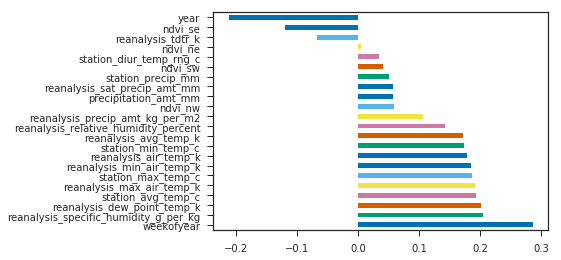

In [103]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)
sns.set(style="ticks", palette="colorblind")

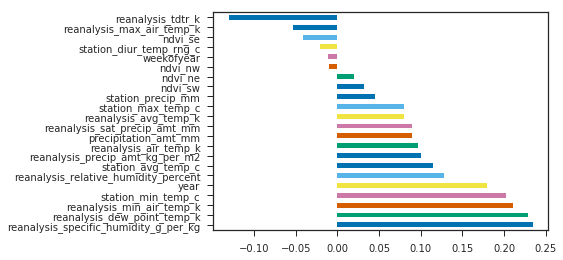

In [104]:
sns.set(style="ticks", palette="colorblind")
# iq
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)

In [105]:
#A few bad variables
#we can drop the columns with negative corellation in both 

dengue_train_sj.drop('week_start_date', axis=1, inplace=True)
dengue_train_iq.drop('week_start_date', axis=1, inplace=True)

dengue_train_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_train_sj.drop('year', axis=1, inplace=True)
dengue_train_iq.drop('year', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_train_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_train_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_train_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_train_sj.drop('weekofyear', axis=1, inplace=True)
dengue_train_iq.drop('weekofyear', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_nw', axis=1, inplace=True)

In [107]:

dengue_test_sj.drop('week_start_date', axis=1, inplace=True)
dengue_test_iq.drop('week_start_date', axis=1, inplace=True)

dengue_test_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_test_sj.drop('year', axis=1, inplace=True)
dengue_test_iq.drop('year', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_test_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_test_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_test_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_test_sj.drop('weekofyear', axis=1, inplace=True)
dengue_test_iq.drop('weekofyear', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_nw', axis=1, inplace=True)

In [108]:
dengue_test_sj.columns

Index(['city', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [109]:
dengue_train_sj.columns

Index(['city', 'total_cases', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [110]:
print('San Juan')
print('mean: ', dengue_train_sj.total_cases.mean())
print('var :', dengue_train_sj.total_cases.var())

print('\nIquitos')
print('mean: ', dengue_train_iq.total_cases.mean())
print('var :', dengue_train_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.89552393656412


In [ ]:
## variance >>>>> mean